## Observations and Insights 

In [282]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
comb_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [283]:
# Checking the number of mice in the DataFrame.
total_mice = comb_df['Mouse ID'].nunique()
total_mice

249

In [284]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = comb_df[comb_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [285]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = comb_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [286]:
# Checking the number of mice in the clean DataFrame.
total_unique_mice = clean_df["Mouse ID"].nunique()
total_unique_mice

249

In [287]:
## Summary Statistics

In [288]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_table = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, "SEM": sem})
summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [289]:
## Bar Plots

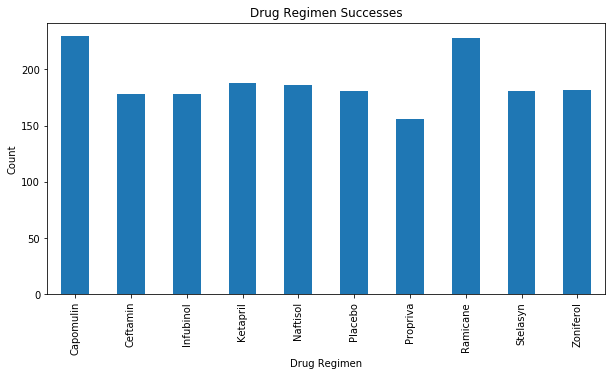

In [290]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
regimen_data = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data.plot(kind="bar", figsize=(10,5))

# Set all titles on chart
plt.title("Drug Regimen Successes")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Show the chart
plt.show()

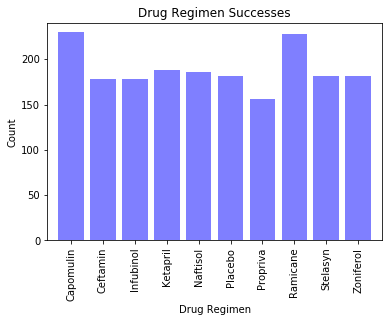

In [291]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# Save drug regimens column to list
drug_regimens = summary_table.index.tolist()

# Save regiment counts to a list
regimen_count = (clean_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

# Set x-axis to length of total regimens
x_axis = np.arange(len(drug_regimens))

# Set bar chart
plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens,  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(regimen_count)+10)

# Set all titles on chart
plt.title("Drug Regimen Successes")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# Show the chart
plt.show()

## Pie Plots

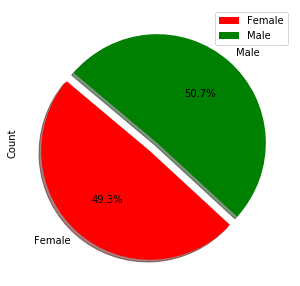

In [292]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count()).reset_index()

# Show only sex and count columns on dataframe
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})

# Plot the values on a pie plot
colors = ['red', 'green']
explode = (0.1, 0)
gender_df.plot(kind='pie',y="Count",figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%", labels=gender_df['Sex'])

(-1.1873380182119184,
 1.1100275294758193,
 -1.1921016731545524,
 1.111940211430077)

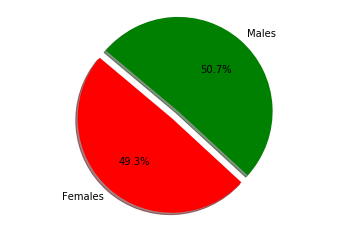

In [293]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create labels for the pie chart sections
labels = ["Females", "Males"]

# Set colors for the pie graph
colors = ['red', 'green']

# Detach section of circle
explode = (0.1, 0)

# Create the pie chart
plt.pie(gender_df["Count"], explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Sets equal axes
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [294]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Sort data by Drug Regime, Mouse ID and Timepoint
sorted_df = clean_df.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)

# Select final volume of each mouse 
max_df = sorted_df.loc[sorted_df["Timepoint"] == 45]
max_df.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [295]:
# Calculate Capomulin IQR

# Select Capomulin data
cap_data_df = max_df[max_df['Drug Regimen'].isin(['Capomulin'])]
cap_data_df.reset_index()

# Convert column into df object
cap_list = cap_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cap_list = cap_list["Tumor Volume (mm3)"]

# IQR calculations
quartiles = cap_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Median: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [296]:
# Calculate Ramicane IQR

# Select Ramicane data
ram_data_df = max_df[max_df['Drug Regimen'].isin(['Ramicane'])]
ram_data_df.reset_index()

# Convert column into df object
ram_list = ram_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
ram_list = ram_list["Tumor Volume (mm3)"]

# IQR calculations
quartiles = ram_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower Quartile: 30.981175224999998
Upper Quartile: 38.508305307499995
IQR: 7.527130082499998
Median: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [297]:
# Calculate Infubinol IQR

# Select Infubinol data
inf_data_df = max_df[max_df['Drug Regimen'].isin(['Infubinol'])]
inf_data_df.reset_index()

# Convert column into df object
inf_list = inf_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
inf_list = inf_list["Tumor Volume (mm3)"]

# IQR calculations
quartiles = inf_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower Quartile: 62.75445141
Upper Quartile: 67.68556862
IQR: 4.9311172099999965
Median: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


In [298]:
# Calculate Ceftamin IQR

# Select Ceftamin data
cef_data_df = max_df[max_df['Drug Regimen'].isin(['Ceftamin'])]
cef_data_df.reset_index()

# Convert column into df object
cef_list = cef_data_df.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
cef_list = cef_list["Tumor Volume (mm3)"]

# IQR calculations
quartiles = cef_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"Lower Quartile: {lowerq}")
print(f"Upper Quartile: {upperq}")
print(f"IQR: {iqr}")
print(f"Median: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Lower Quartile: 61.43389223
Upper Quartile: 67.52748237
IQR: 6.093590140000003
Median: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


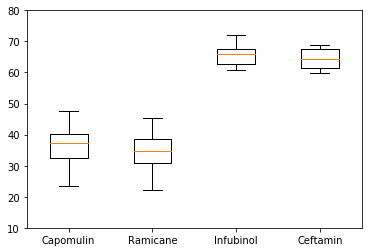

In [299]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
iqr_df = max_df.reset_index()
tumor_lists = iqr_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_df = pd.DataFrame(tumor_lists)
tumor_df = tumor_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_df['Tumor Volume (mm3)']]
plt.ylim(10, 80)
plt.boxplot(tumor_vols, labels=top_4)
plt.show()

## Line and Scatter Plots

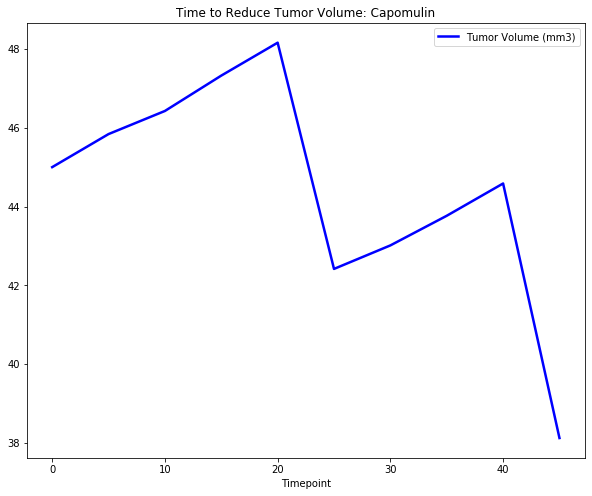

In [300]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Create a new DataFrame that looks into Capomulin
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
cap_df = cap_df.reset_index()

# Select data of a single mouse
cap_single_df = cap_df.loc[cap_df["Mouse ID"] == "j119"]

# Select the columns
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

# Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)

# Generate the line plot
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue', title="Time to Reduce Tumor Volume: Capomulin")

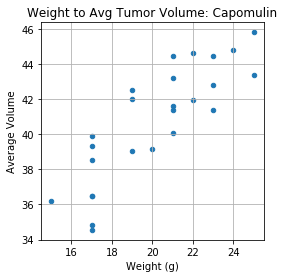

In [301]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Select columns
reduced_df = cap_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]

# Calculate average tumor volumes
average_cap = pd.DataFrame(reduced_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()

# Rename column
average_cap = average_cap.rename(columns={"Tumor Volume (mm3)": "Average Volume"})

# Set index
average_cap = average_cap.set_index('Mouse ID')

# Plot on scatter
average_cap.plot(kind="scatter", x="Weight (g)", y="Average Volume", grid=True, figsize=(4,4), title="Weight to Avg Tumor Volume: Capomulin")
plt.show()

## Correlation and Regression

In [302]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouse_weight = average_cap.iloc[:,0]
avg_tumor_volume = average_cap.iloc[:,1]
correlation = sts.pearsonr(mouse_weight,avg_tumor_volume)
print(f"The correlation is equal to {round(correlation[0],2)}")

The correlation is equal to 0.84


The linear regression equation is y = 0.95x + 21.55


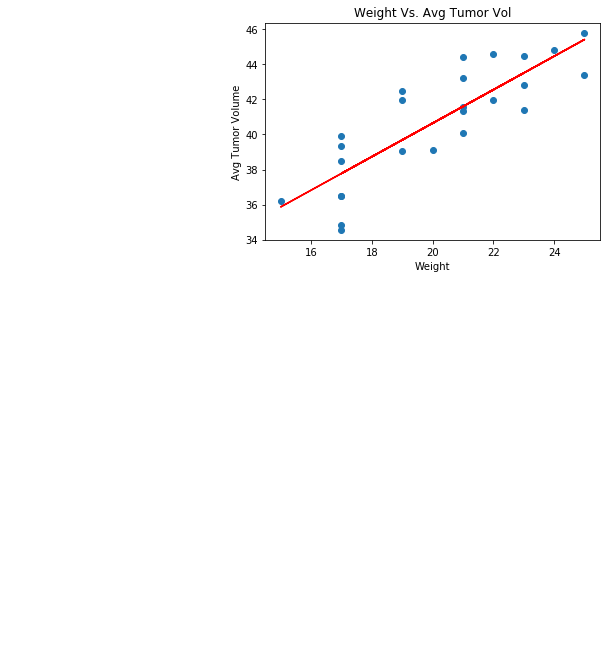

In [303]:
# Plot the correlation
x_values = average_cap["Weight (g)"]
y_values = average_cap["Average Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
print(f"The linear regression equation is {line_eq}")
plt.show()